# Visualization Tools
This notebook illustrates the basic usage of the visualization package.
We will visualize different annotation types for images (bounding boxes and object masks) and discuss the difference between the functional and module based api.

First, lets import some requirements

In [1]:
from __future__ import annotations

from vis4d.common.typing import NDArrayF64, NDArrayI64
from vis4d.vis.image.functional import imshow_bboxes, imshow_masks, imshow_topk_bboxes, imshow, draw_bboxes, draw_masks, imshow_track_matches

import pickle
import numpy as np

Lets load some data to visualize

In [2]:
with open("data/draw_bbox_with_cts.pkl", "rb") as f:
    testcase_gt = pickle.load(f)

images: list[NDArrayF64] = testcase_gt["imgs"]
boxes: list[NDArrayF64] = testcase_gt["boxes"]
classes: list[NDArrayI64] = testcase_gt["classes"]
scores: list[NDArrayF64] = testcase_gt["scores"]
tracks = [np.arange(len(b)) for b in boxes]

print(f"Loaded {len(images)} Images with {[len(box) for box in boxes]} bounding boxes each")

Loaded 2 Images with [19, 14] bounding boxes each


Lets show the first image and respective bounding box annotations

The raw Image:

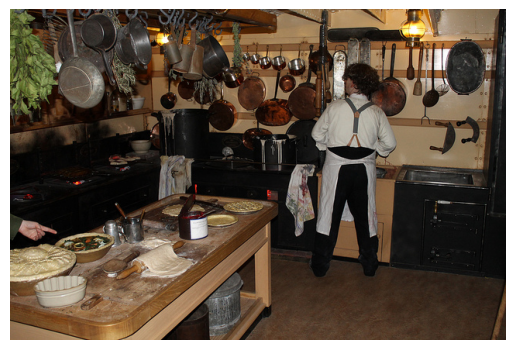

In [3]:
imshow(images[0])

The respective bounding box annotations

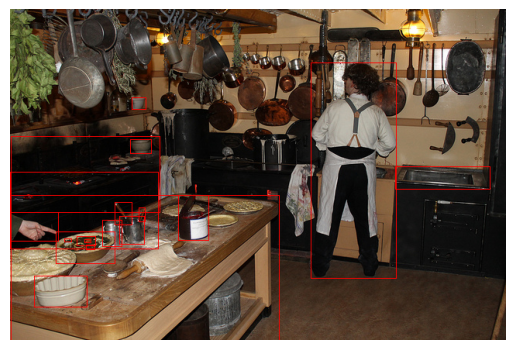

In [4]:
imshow_bboxes(images[0], boxes[0])

Lets show some additional informatiion as e.g. class id, track_id and scores

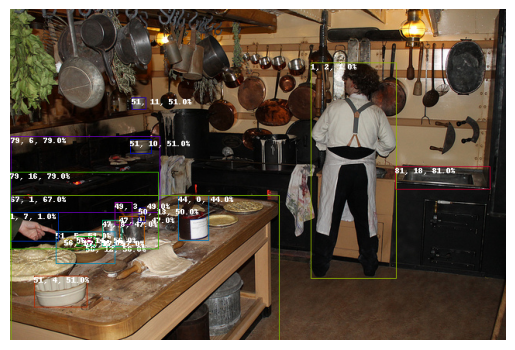

In [5]:
imshow_bboxes(images[0], boxes[0], class_ids = classes[0], scores = scores[0], track_ids = tracks[0])

Note that the first number denotes the classs id, the second the track id and the last one the confidence score in %. 
We can map the class ids to names by providing a mapping to the visualization function

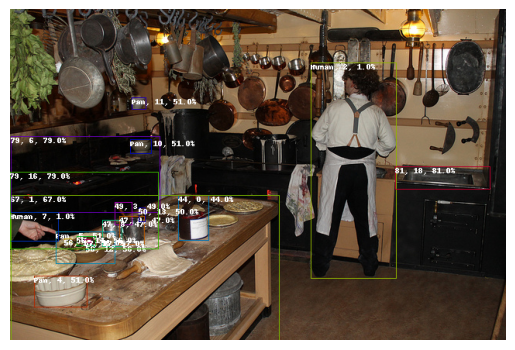

In [6]:
imshow_bboxes(images[0], boxes[0], class_ids = classes[0], scores = scores[0], track_ids = tracks[0], class_id_mapping = {1 : "Human", 51: "Pan"})

Now lets only visualize the top 3 bounding boxes with highest score

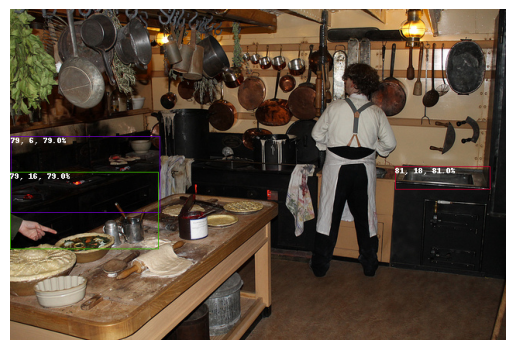

In [7]:
imshow_topk_bboxes(images[0], boxes[0], topk = 3, class_ids = classes[0], scores = scores[0], track_ids = tracks[0], class_id_mapping = {1 : "Human", 51: "Pan"})

### Segmentation Masks
Finally, lets also visualize some segmentation masks

In [8]:
with open("data/mask_data.pkl", "rb") as f:
    testcase_in = pickle.load(f)

    images = [e["img"] for e in testcase_in]
    masks = [np.stack(e["masks"]) for e in testcase_in]
    class_ids = [np.stack(e["class_id"]) for e in testcase_in]

print(f"Loaded {len(images)} with {[len(m) for m in masks]} masks each.")

Loaded 2 with [14, 19] masks each.


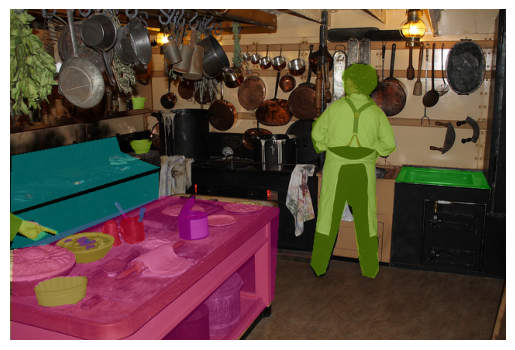

In [9]:
imshow_masks(images[1], masks[1], class_ids = class_ids[1])

## Combine Masks and Bounding Boxes

We can also compose both visualization methods by using the draw functionality:

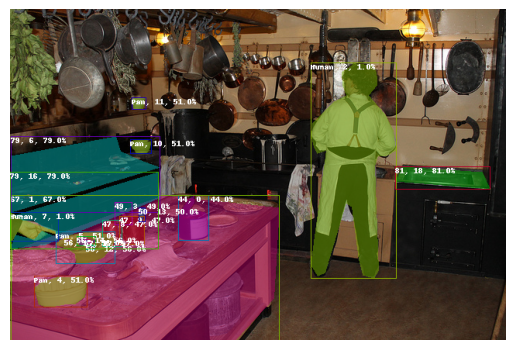

In [ ]:
img = draw_masks(images[1], masks[1], class_ids = class_ids[1])
img = draw_bboxes(img, boxes[0], class_ids = classes[0], scores = scores[0], track_ids = tracks[0], class_id_mapping = {1 : "Human", 51: "Pan"}).as_numpy_image()
imshow(img)

## Tracking Matches

Lets show matching bounding boxes one by one which were assigned by their track ids

In [11]:
with open("data/draw_bbox_with_cts.pkl", "rb") as f:
    testcase_gt = pickle.load(f)

images: list[NDArrayF64] = testcase_gt["imgs"]
boxes: list[NDArrayF64] = testcase_gt["boxes"]
classes: list[NDArrayI64] = testcase_gt["classes"]
scores: list[NDArrayF64] = testcase_gt["scores"]
tracks = [np.arange(len(b)) for b in boxes]

print(f"Loaded {len(images)} Images with {[len(box) for box in boxes]} bounding boxes each")

Loaded 2 Images with [19, 14] bounding boxes each


In [12]:
# Lets only assign the same track id to the first 4 boxes to keep visualizations down
tracks[0][4:] = 100
tracks[1][4:] = 101 

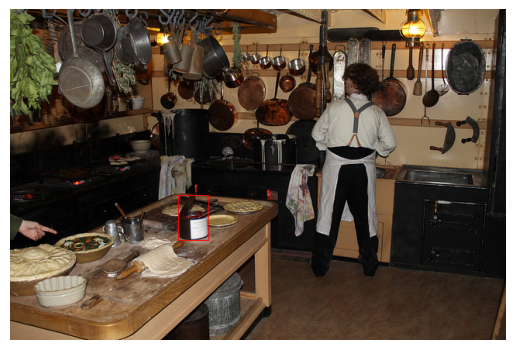

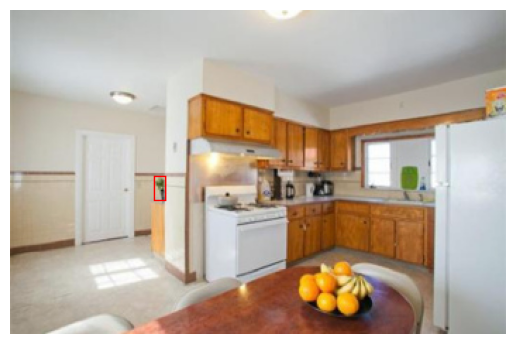

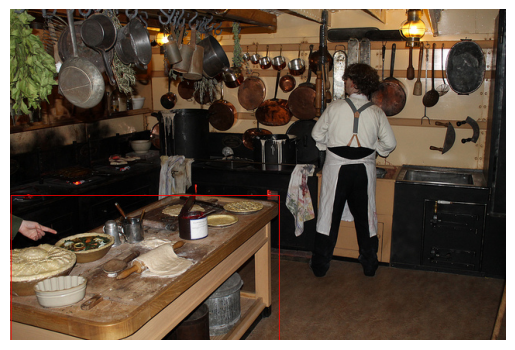

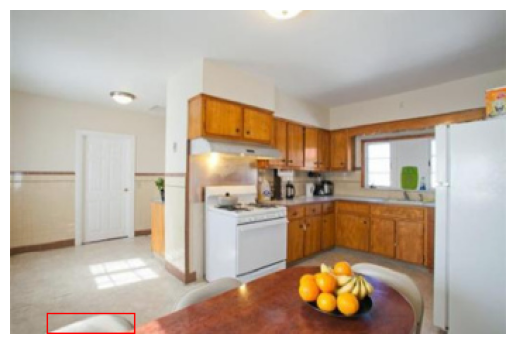

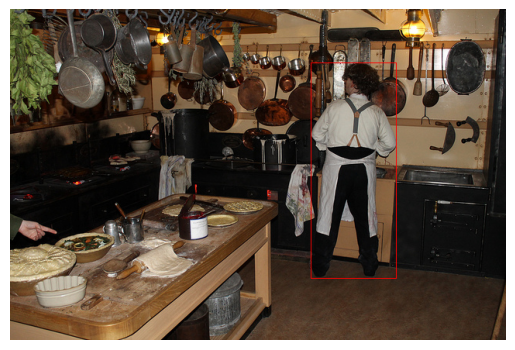

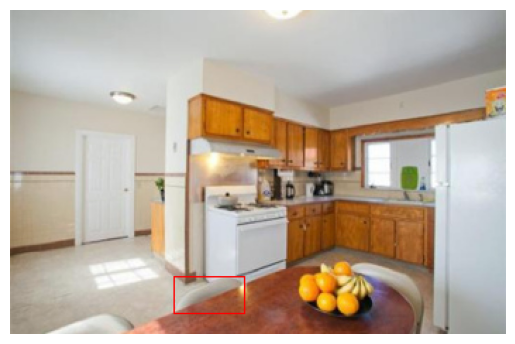

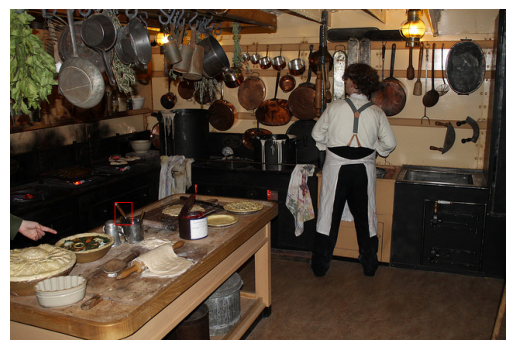

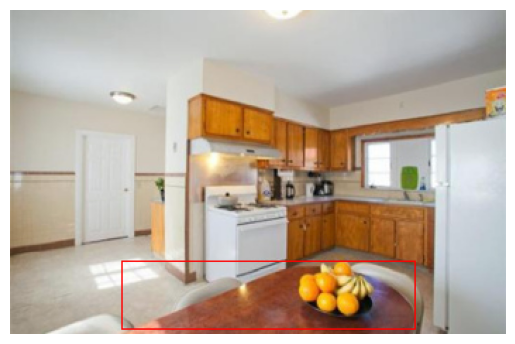

In [13]:
imshow_track_matches([images[0]], [images[1]], key_boxes = [boxes[0]], ref_boxes = [boxes[1]], key_track_ids=[tracks[0]], ref_track_ids=[tracks[1]])